In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
csv_files = [
    'coop_navi.csv', 
    'coop_navi_shared.csv', 
    'coop_navi_shuffle_episode.csv', 
    #'coop_navi_shuffle_timestep.csv',
    'coop_navi_ensemble_episode.csv',
    #'coop_navi_ensemble_timestep.csv'
]
labels = [
    'Vanilla MADDPG',
    'MADDPG + shared',
    'MADDPG + shuffle',
    #'MADDPG + shuffle timestep',
    'MADDPG + ensemble',
    #'MADDPG + ensemble timestep'
]
data_eval_means = []
data_sheldon_means = []
data_eval_stds = []
data_sheldon_stds = []
for csv_file in csv_files:
    with open(csv_file, 'r') as f:
        csvreader = csv.reader(f, delimiter=',')
        eval_rows = []
        sheldon_rows = []
        for row in csvreader:
            if 'eval.pkl' in row[0]:
                eval_rows.append([float(x) for x in row[1:]])
            else:
                sheldon_rows.append([float(x) for x in row[1:]])
        data_eval_means.append(np.mean(eval_rows, axis=0))
        data_eval_stds.append(np.std(eval_rows, axis=0))
        data_sheldon_means.append(np.mean(sheldon_rows, axis=0))
        data_sheldon_stds.append(np.std(sheldon_rows, axis=0))
data_eval_means = np.array(data_eval_means)
data_eval_stds = np.array(data_eval_stds)
data_sheldon_means = np.array(data_sheldon_means)
data_sheldon_stds = np.array(data_sheldon_stds)

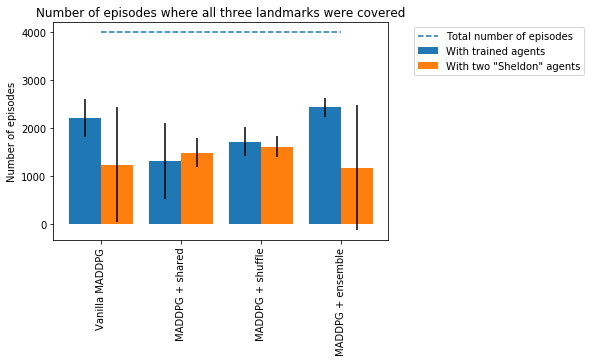

In [21]:
plt.bar(np.arange(len(csv_files)), data_eval_means[:, 1], 0.4, yerr=data_eval_stds[:, 1])
plt.bar(np.arange(len(csv_files)) + .4, data_sheldon_means[:, 1], 0.4, yerr=data_sheldon_stds[:, 1])
plt.ylabel('Number of episodes')
plt.xticks(np.arange(len(csv_files)) + .2, labels, rotation='vertical')
plt.title('Number of episodes where all three landmarks were covered')
plt.plot(np.arange(len(csv_files)) + .2, data_eval_means[:, 0], linestyle='--')
plt.legend(['Total number of episodes', 'With trained agents', 'With two "Sheldon" agents'], loc='upper right', bbox_to_anchor=(1.6, 1.0))


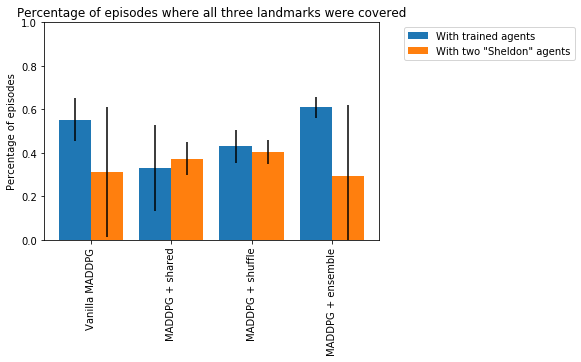

In [22]:
plt.bar(np.arange(len(csv_files)), data_eval_means[:, 2], 0.4, yerr=data_eval_stds[:, 2])
plt.bar(np.arange(len(csv_files)) + .4, data_sheldon_means[:, 2], 0.4, yerr=data_sheldon_stds[:, 2])
plt.ylim(0, 1)
plt.ylabel('Percentage of episodes')
plt.xticks(np.arange(len(csv_files)) + .2, labels, rotation='vertical')
plt.title('Percentage of episodes where all three landmarks were covered')
plt.legend(['With trained agents', 'With two "Sheldon" agents'], loc='upper right', bbox_to_anchor=(1.6, 1.0))

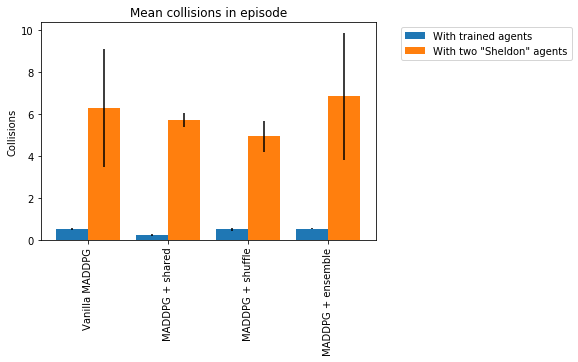

In [23]:
plt.bar(np.arange(len(csv_files)), data_eval_means[:, 3], 0.4, yerr=data_eval_stds[:, 3])
plt.bar(np.arange(len(csv_files)) + .4, data_sheldon_means[:, 3], 0.4, yerr=data_sheldon_stds[:, 3])
plt.ylabel('Collisions')
plt.xticks(np.arange(len(csv_files)) + .2, labels, rotation='vertical')
plt.title('Mean collisions in episode')
plt.legend(['With trained agents', 'With two "Sheldon" agents'], loc='upper right', bbox_to_anchor=(1.6, 1.0))

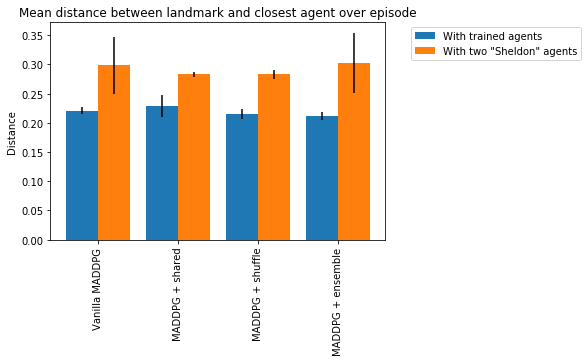

In [24]:
plt.bar(np.arange(len(csv_files)), data_eval_means[:, 4], 0.4, yerr=data_eval_stds[:, 4])
plt.bar(np.arange(len(csv_files)) + .4, data_sheldon_means[:, 4], 0.4, yerr=data_sheldon_stds[:, 4])
plt.ylabel('Distance')
plt.xticks(np.arange(len(csv_files)) + .2, labels, rotation='vertical')
plt.title('Mean distance between landmark and closest agent over episode')
plt.legend(['With trained agents', 'With two "Sheldon" agents'], loc='upper right', bbox_to_anchor=(1.6, 1.0))